In [1]:
from pandas import (
    concat,
    read_csv,
    to_datetime,
)

from post_processing.utils.fpod_utils import extract_site, percent_calc, year_percent, ym_percent, create_matrix,hist_mean_h, hist_mean_m, hist_mean_s
from post_processing.utils.core_utils import get_season

## Overview
Import the right dataset.

#### *CALAIS*

In [44]:
ca4 = read_csv(r"L:\acoustock\Bioacoustique\DATASETS\CPOD_PROJETS\CALAIS\DATA\DATA_FULL_OTHERCET\Hours_DPM_FBUZZ_CA4_ssTL.csv")
walde = read_csv(r"L:\acoustock\Bioacoustique\DATASETS\CPOD_PROJETS\CALAIS\DATA\DATA_FULL_OTHERCET\Hours_DPM_FBUZZ_Walde_ssTL.csv")

data_c = concat([ca4, walde])
data_c["start_datetime"] = to_datetime(data_c["start_datetime"])
data_c["start_datetime"] = data_c["start_datetime"].apply(lambda x : x.tz_convert("Europe/Paris"))
data_c["Hour"] = data_c["start_datetime"].dt.hour

#### *CETIROISE*

In [ ]:
ceti = read_csv(r"U:\Hours_DPM_FBUZZ_CETIROISE.csv")

ceti["start_datetime"] = to_datetime(ceti["start_datetime"])
ceti["start_datetime"] = ceti["start_datetime"].apply(lambda x : x.tz_convert("CET")) #TimeZone Central European Time
ceti["Hour"] = ceti["start_datetime"].dt.hour

#### *KERGUELEN*

In [22]:
a = read_csv(r"U:\Hours_DPM_FBUZZ_A.csv")
b = read_csv(r"U:\Hours_DPM_FBUZZ_B.csv")
c = read_csv(r"U:\Hours_DPM_FBUZZ_C.csv")
d = read_csv(r"U:\Hours_DPM_FBUZZ_D.csv")

data_k = concat([a, b, c, d])
data_k["start_datetime"] = to_datetime(data_k["start_datetime"])
data_k["start_datetime"] = data_k["start_datetime"].apply(lambda x : x.tz_convert("Indian/Kerguelen"))
data_k["Hour"] = data_k["start_datetime"].dt.hour

### First results
Precise your dataset.

In [45]:
data = data_c #🐬

In [46]:
data = extract_site(data)
data["YMH"] = data["Year"].astype(str) + '-' + data["Month"].astype(str) + '-' + data["Hour"].astype(str)
y_per = percent_calc(data, "Year")
#t_per = percent_calc(data, "TRAVAUX")

C:\Users\fouinel\AppData\Local\Temp\ipykernel_24020\669083797.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Date'] = data["start_datetime"].dt.to_period('D').dt.to_timestamp()


In [47]:
ym_per = percent_calc(data, "YM")
ym_per["YM"] = to_datetime(ym_per["YM"])
ym_per["Season"] = ym_per["YM"].apply(lambda x: get_season(x)[0]) #If in the southern hemisphere, write "get_season(x, northern = False)".
ym_per["Month"] = ym_per["YM"].dt.month
ym_per["Year"] = ym_per["YM"].dt.year

In [30]:
per_h = percent_calc(data, "YMH")
per_h[["Y","M","Hour"]] = per_h["YMH"].str.split("-", expand=True)
per_h["Hour"] = per_h["Hour"].astype(int)

In [31]:
matrice_s = create_matrix(ym_per, ["site.name"],["%DPH", "FBR"])
matrice_m = create_matrix(ym_per, ["site.name", "Month"],["%click", "FBR"])
matrice_h = create_matrix(per_h, ["site.name", "Hour"],["%click", "FBR"])

In [ ]:
hist_mean_s(
    matrice_s,
    metric_mean="%DPH_mean",
    metric_std="%DPH_std",
    ylabel="Moyenne %DPH",
    title_suffix="%DPH"
)

In [ ]:
year_percent(y_per, "FBR")

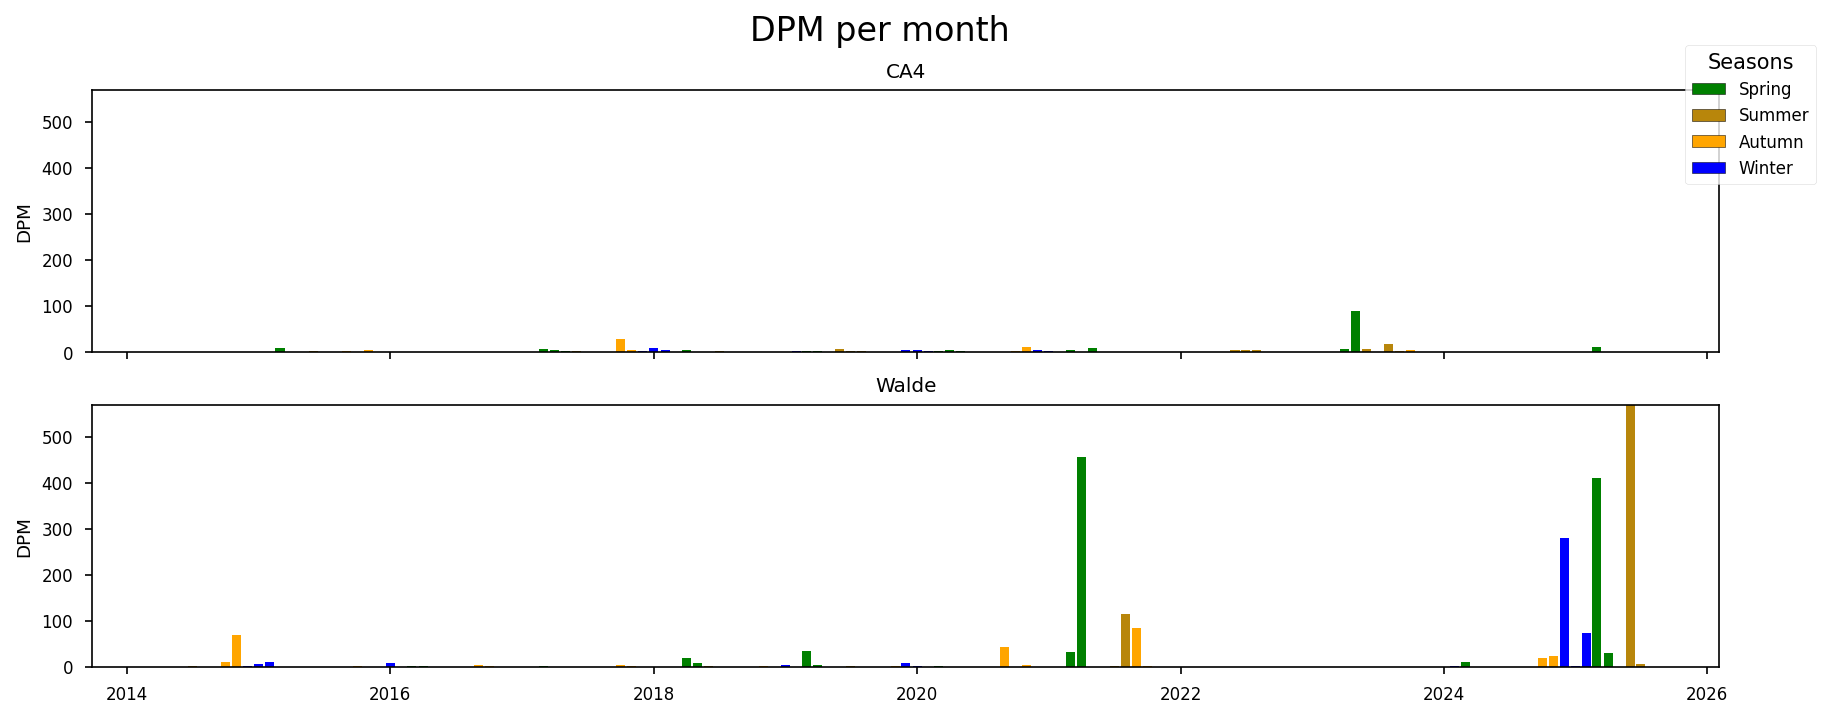

In [48]:
ym_percent(ym_per, "DPM")

In [ ]:
hist_mean_m(
    matrice_m,
    metric_mean="%click_mean",
    metric_std="%click_std",
    ylabel="Moyenne %click",
    title_suffix="%click"
)

In [ ]:
hist_mean_h(
    matrice_h,
    metric_mean="FBR_mean",
    metric_std="FBR_std",
    ylabel="Feeding buzz ratio",
    title_suffix="FBR"
)